In [1]:
### Linear Regression

## predict house prices

In [2]:
# Import statements
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
## The Boston Housing Prices dataset

#get dataset
boston_housing = keras.datasets.boston_housing
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 2s 37us/step


In [4]:
#Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels= train_labels[order]

In [5]:
train_data

array([[7.87500e-02, 4.50000e+01, 3.44000e+00, ..., 1.52000e+01,
        3.93870e+02, 6.68000e+00],
       [4.55587e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.54700e+02, 7.12000e+00],
       [9.60400e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.96900e+02, 2.98000e+00],
       ...,
       [4.07710e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.95240e+02, 2.14600e+01],
       [6.66400e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.90960e+02, 5.33000e+00],
       [7.02259e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.19980e+02, 1.57000e+01]])

In [6]:
train_labels

array([32. , 27.5, 32. , 23.1, 50. , 20.6, 22.6, 36.2, 21.8, 19.5, 15. ,
       15.6, 50. , 30.1, 12.5, 22.2, 26.5, 50. ,  8.3, 16.5, 17.8, 15.7,
       19.3, 26.6, 29. , 15.6, 18.7, 24.1, 13.3,  8.5, 19.5, 13.1, 11.7,
       25. , 24.8, 20.6, 12.1, 19.6, 25. , 22.7, 14.6, 17.1, 50. , 22.6,
       13.1, 20.6, 18.4, 24.8, 25. , 18.1, 16.8, 16.1, 24.4, 18.5, 21. ,
       19.1, 16.1, 18.2, 15.3, 20.4, 17.8, 23. ,  7.2, 16.7, 33.4, 13.8,
       43.8, 28.6, 18.3, 18.7, 17.3, 19.4, 11.9, 20.6, 23.7, 50. , 22.6,
       25.3, 24.8, 18.7, 21.7, 20.6, 23.2, 26.4, 33.2, 15.2, 41.3, 23.9,
       31. , 13.4, 23.9, 14.9, 22.8, 28. , 20.4, 12.8, 20.6, 21.4, 14.8,
       15.6, 30.1, 11. , 25. , 11.7, 16.3, 33.4, 22.9, 29.1, 21. , 31.1,
       19.3, 23.4, 28.7, 16. , 23.2, 17.2, 26.6, 17.8, 22.3, 20.8, 25.2,
       28.5, 23.3, 20.1, 19.3, 19.4, 12.7, 37.3, 13.9, 19.6, 12.7, 15.6,
       32.2, 12.6,  7.5, 23.7, 22.8, 22.2, 44.8, 36.5, 31.6, 22.9, 14.4,
       14.3,  5. , 19.1, 22.5, 10.9, 23. , 21.4,  8

In [7]:
## Examples and features
print("Training set: {}".format(train_data.shape))
# 404 examples, 13 features
print("Testing set: {}".format(test_data.shape))
# 102 examples, 13 features

Training set: (404, 13)
Testing set: (102, 13)


In [8]:
print(train_data[0])


[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [9]:
## Use pandas to display few rows nicely

In [11]:
import pandas as pd

column_names = ['CRIM','ZN','INDUS','CHAS','NOX',
               'RM','AGE','DIS','RAD','TAX','PTRATIO',
               'B','LSTAT']
df = pd.DataFrame(train_data,columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [12]:
# Labels
print(train_labels[0:10]) #display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [13]:
## Normalize features
# for each feature , subract the mean and divide by standard deviation

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data - mean)/std

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [14]:
## Create the model

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                          input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64,activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics = ['mae'])
    return model



In [16]:
model  =build_model()

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [18]:
## Train the model

# Display training progress by printing a single dot
# for each completed epoch

class PrintDot(keras.callbacks.Callback):
   def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.',end='')
EPOCHS = 500

# store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks= [PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

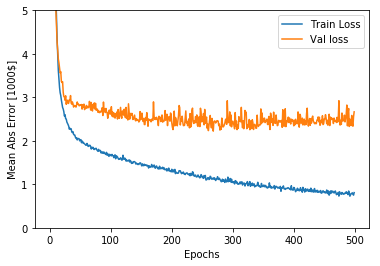

In [19]:
## Display graphically

def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
            label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label='Val loss')
    plt.legend()
    plt.ylim([0,5])
plot_history(history)



....................................................................................................
......................................................

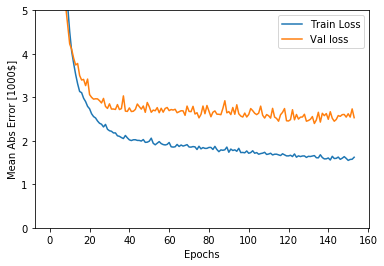

In [20]:
model= build_model()

# the patience parameter is the amoutn of epochs to check for improvement.

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks = [early_stop,PrintDot()])
plot_history(history)

In [21]:
## see how the model performs on the test data
[loss, mae] = model.evaluate(test_data,test_labels, verbose=0)
print('Testing set mean abs error: ${:7.2f}'.format(mae*1000))

Testing set mean abs error: $2719.60


In [22]:
# finally predict some housing prices using data in testing set

test_predictions = model.predict(test_data).flatten()
print(test_predictions)

[ 7.8921223 19.046412  21.22845   34.67466   25.4912    21.654041
 24.912382  22.581444  19.684025  21.874458  16.887802  16.033705
 15.906145  41.791378  18.436367  19.94329   26.734543  18.199469
 19.013868  24.824389  10.909732  13.117516  21.126839  15.7946205
 19.53372   25.1562    29.886791  28.492935   9.815106  20.668865
 20.135609  13.795497  33.043922  25.19226   15.851385   8.160337
 17.004536  17.45074   18.21305   25.222378  29.620338  28.160494
 12.545248  40.928204  29.808498  25.914389  27.486893  17.849232
 21.932495  22.394133  33.680027  21.489822  10.311902  16.00018
 34.152615  27.58916   11.0292425 47.628452  34.618534  23.624376
 23.414066  14.927137  13.47701   19.407787  22.962679  21.519981
 12.59929   22.406357  12.165911   7.012865  24.932457  29.490385
 26.852882  12.799355  25.113585  18.413025  20.051704  24.028107
 35.94663    9.6223955 21.179062  37.478508  16.622292  12.479809
 17.173094  19.06555   18.445957  21.549583  20.553768  32.083477
 21.791718

In [ ]:
## early stopping technique p